# AICTE Data Analytics Internship 2023

## Case Study: Analysis of Superstore

#### Author: Ankit Sharma

### Importing Required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing

In [4]:
data.shape

(9994, 13)

In [5]:
#Removing unnecessary columns Postal Code and Region
data.drop(["Country","Postal Code"], axis=1, inplace = True)

In [6]:
data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
data.shape

(9994, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [9]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [11]:
data.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(9944, 11)

In [15]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [16]:
#most common or maximum occuring value from each column
data.max()

Ship Mode       Standard Class
Segment            Home Office
City                      Yuma
State                  Wyoming
Region                    West
Category            Technology
Sub-Category            Tables
Sales                 22638.48
Quantity                    14
Discount                   0.8
Profit                8399.976
dtype: object

In [17]:
#most common or maximum occuring value from each column
data.min()

Ship Mode       First Class
Segment            Consumer
City               Aberdeen
State               Alabama
Region              Central
Category          Furniture
Sub-Category    Accessories
Sales                 0.444
Quantity                  1
Discount                0.0
Profit            -6599.978
dtype: object

## Data Visualization

### 1. Plotting Correlation Heatmap

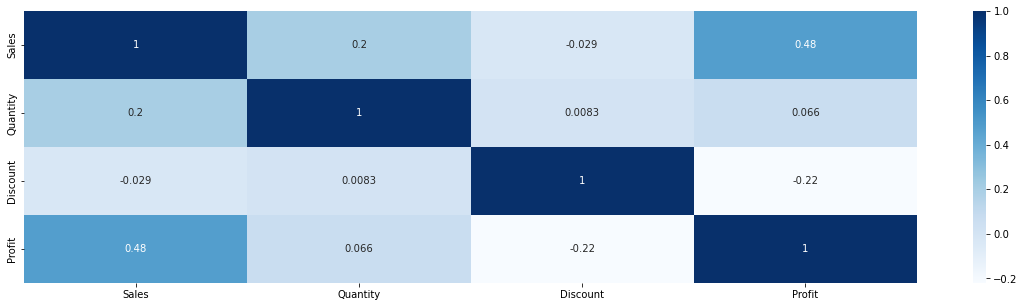

In [19]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.show()

### _Conclusion:_
- **Above Heatmap is showing that Sales are highly correlated with Profit and quite low with Quantity and Discount.**

### 2. State wise sales count

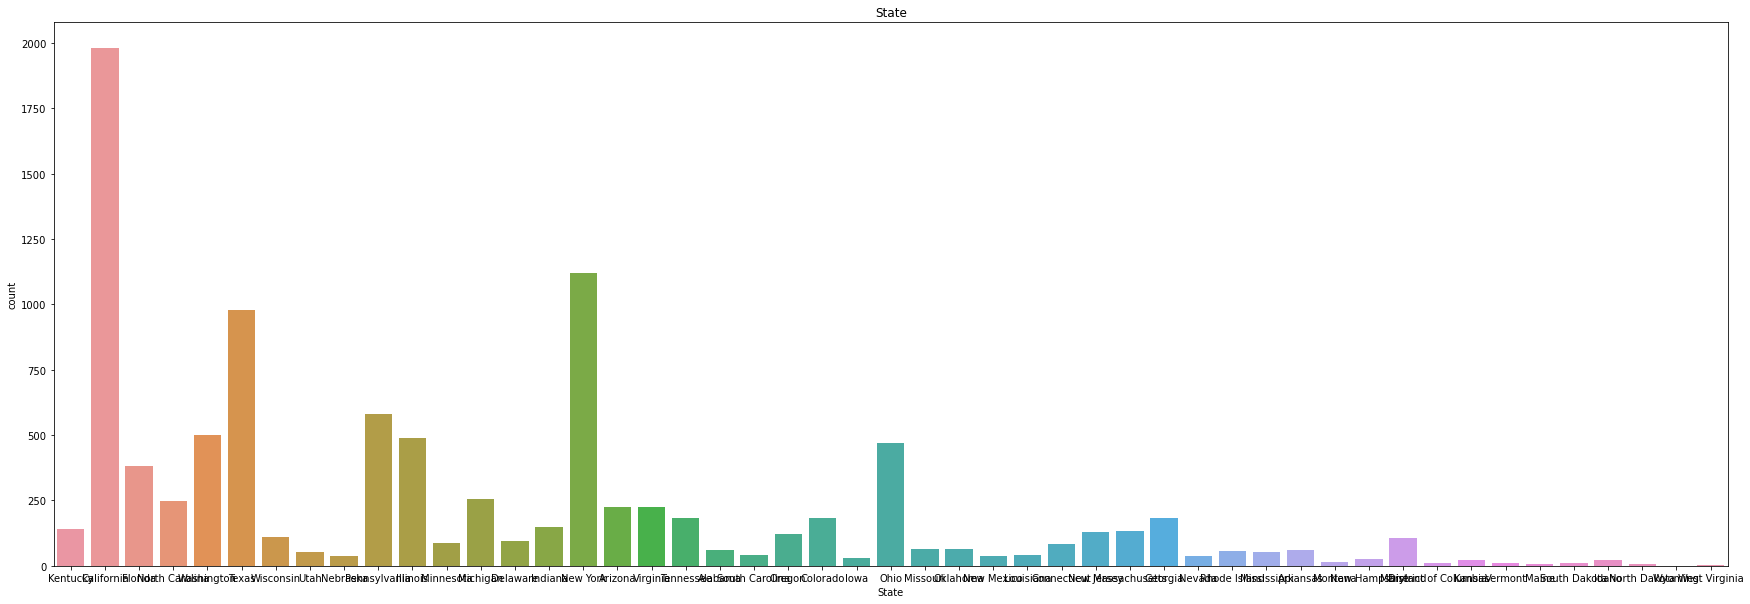

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(x=data['State'])
plt.title('State')
plt.show()

### _Conclusion:_
- **Carlifornia state having highest sales follwed by New York City, Texas and Ohio State.**

### 3. Region wise total Sales count 

In [21]:
regions_info = data.groupby('Region').sum()
regions_info

,Sales,Quantity,Discount,Profit
Region,,,,
Central,500724.2708,8758,555.74,39662.0474
East,677843.9080,10574,412.10,91471.0909
South,391721.9050,6209,238.55,46749.4303
West,724309.2935,12187,349.25,108214.9893


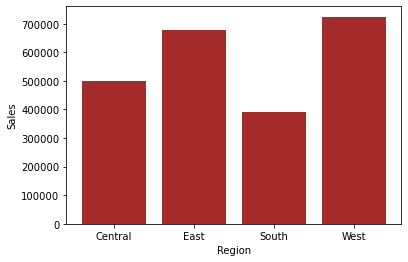

In [22]:
plt.bar(regions_info.index, regions_info['Sales'], color="Brown")
plt.xticks(regions_info.index)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

### _Conclusion:_
- **West & East region are having most of the sales.** 

### 4. Region wise total Profit count

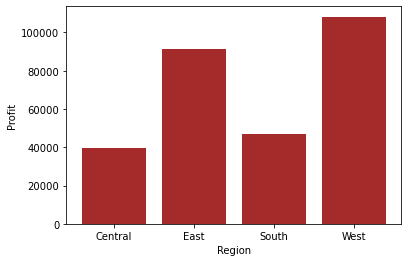

In [23]:
plt.bar(regions_info.index, regions_info['Profit'], color="Brown")
plt.xticks(regions_info.index)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

### _Conclusion:_
- **Again West & East region are having most of the profits.**
- **But if we look carefully above two plots then it shows that Central region is having more sales than South region but Central region is having less profit than South region. Why so?**

### 5. Which Category is Best Selling and Most Profitable?

In [24]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [25]:
#Group sales, profit & quantity by caregory
category_analysis = pd.DataFrame(data.groupby(['Category'])[['Sales','Profit','Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,740568.6663,18484.9459,8010
Office Supplies,718256.0700,122196.0726,22786
Technology,835774.6410,145416.5394,6932


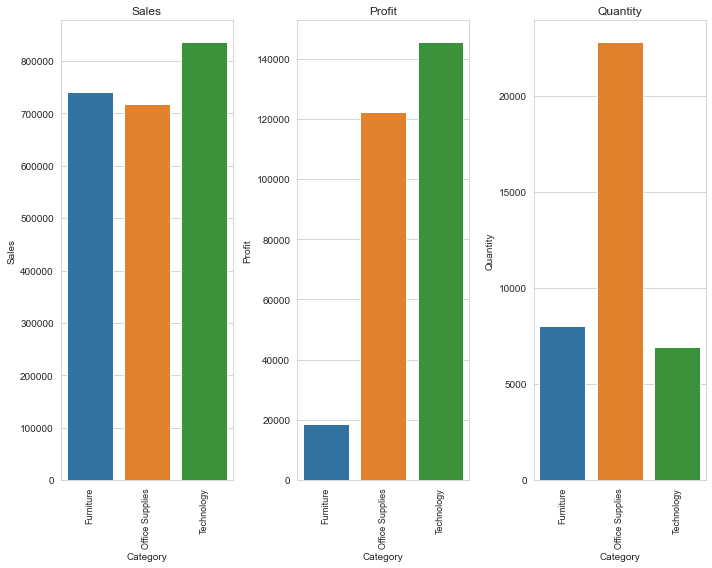

In [26]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_style('whitegrid')
figure,axis = plt.subplots(1,3,figsize=(10,8))

#PLot barplots
cat1= sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0] )
cat2= sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1] )
cat3= sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2] )

#Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

#Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size=9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size=9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size=9)

#Set spacing between subplots
figure.tight_layout()

### _Conclusion:_
- **Above plot shows that Technology category is having highest sales and profit inspite of having very less production while Furniture category is seeing as very loss making as it is having 2nd largest sales but very less profit.**

### 6. Each sub-category and their sales

<AxesSubplot:title={'center':'Each sub-category and their sales'}, xlabel='Sub-Category', ylabel='Sales'>

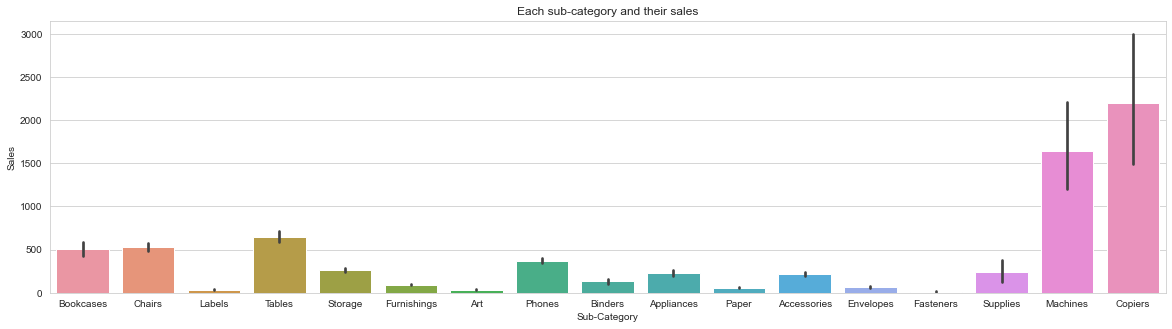

In [27]:
plt.figure(figsize=(20,5))
plt.title("Each sub-category and their sales")
sns.barplot(x = data['Sub-Category'] , y = data["Sales"])

### _Conclusion:_
- **Copiers and Machines are the most selling Sub-Categories.**

### 7. Each sub-category and their profit

<AxesSubplot:title={'center':'Each sub-category and their profit'}, xlabel='Sub-Category', ylabel='Profit'>

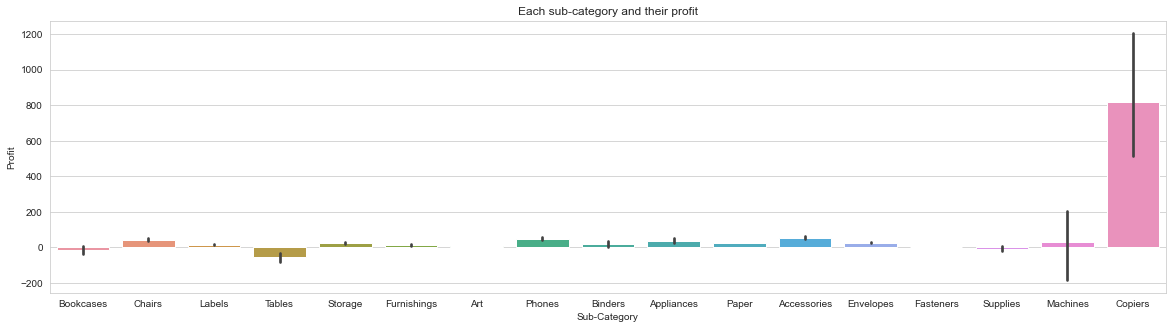

In [28]:
plt.figure(figsize=(20,5))
plt.title("Each sub-category and their profit")
sns.barplot(x = data['Sub-Category'] , y = data["Profit"])

### _Conclusion:_
- **Copiers is the most profit making Sub-Categories.**
- **Tables and Bookcases are loss making Sub-Categories as they belongs to furniture category which is making very less profit than it's competitors.**

### 8. Number of orders for each sub-category

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each sub-category'}, xlabel='Sub-Category', ylabel='count'>

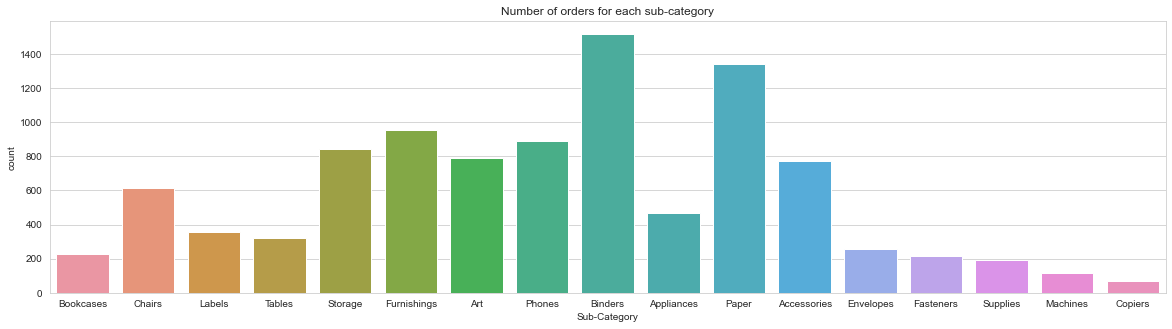

In [29]:
plt.figure(figsize=(20,5))
plt.title("Number of orders for each sub-category")
sns.countplot(data['Sub-Category'],label="Count")

### _Conclusion:_
- **Binders, Paper, Accessories, Furnishings, Storage and Phones are getting most of the orders.**

### 9. Number of orders for each Ship Mode

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each Ship Mode'}, xlabel='Ship Mode', ylabel='count'>

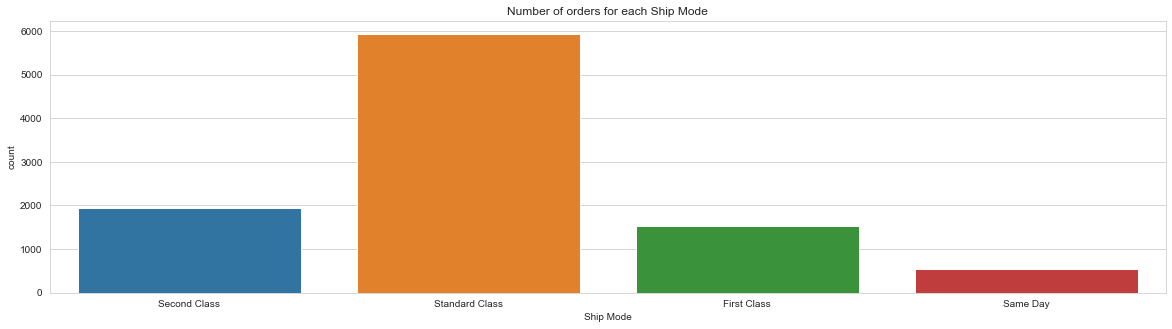

In [30]:
plt.figure(figsize=(20,5))
plt.title("Number of orders for each Ship Mode")
sns.countplot(data['Ship Mode'],label="Count")

### _Conclusion:_
- **Standard Class receiving most of the orders.**

### 10. Ship mode and their sales

<AxesSubplot:title={'center':'Ship mode and their sales'}, xlabel='Ship Mode', ylabel='Sales'>

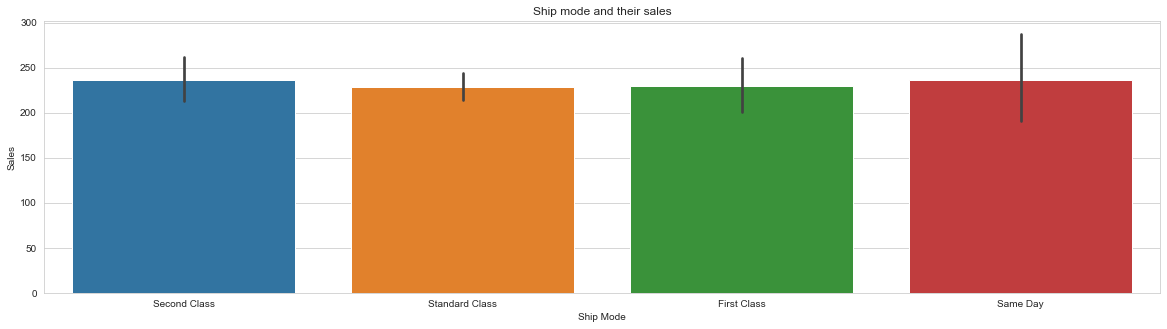

In [31]:
plt.figure(figsize=(20,5))
plt.title("Ship mode and their sales")
sns.barplot(x = data['Ship Mode'] , y = data["Sales"])

### _Conclusion:_
- **Sales for all ship modes is approximately similar.**

### 11. Ship mode and their profit

<AxesSubplot:title={'center':'Ship mode and their profit'}, xlabel='Ship Mode', ylabel='Profit'>

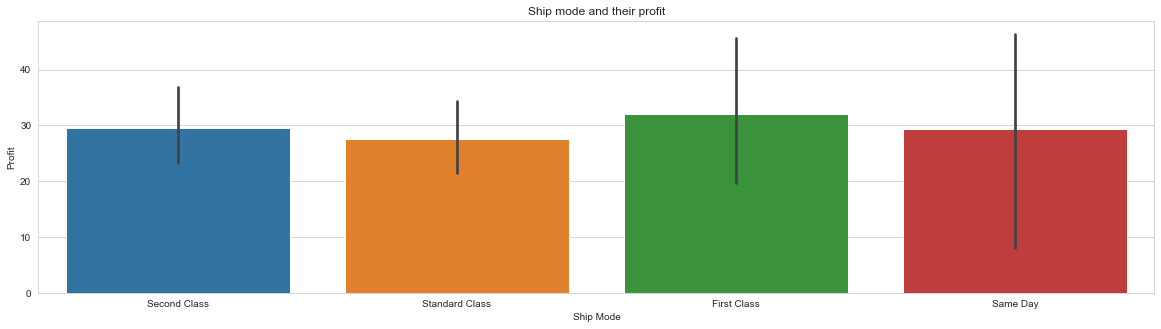

In [32]:
plt.figure(figsize=(20,5))
plt.title("Ship mode and their profit")
sns.barplot(x = data['Ship Mode'] , y = data["Profit"])

### _Conclusion:_
- **First class is having highest profit and remaining three ship modes sharing approximately similar profit.**

### 12. Number of orders for each segment

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each segment'}, xlabel='Segment', ylabel='count'>

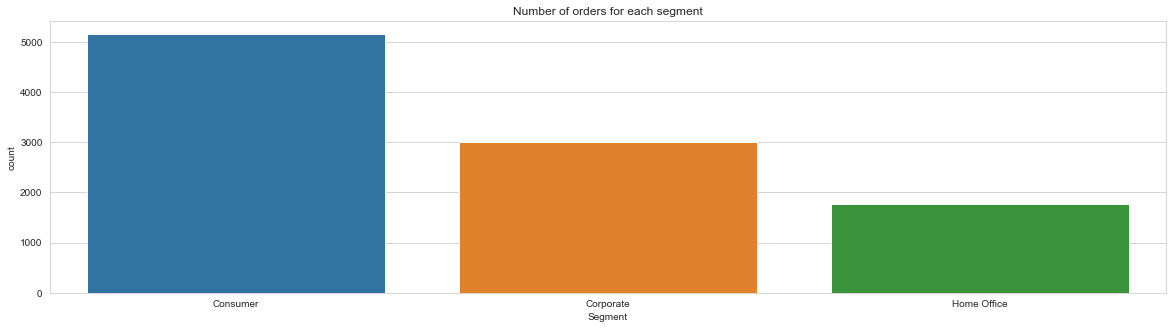

In [33]:
plt.figure(figsize=(20,5))
plt.title("Number of orders for each segment")
sns.countplot(data['Segment'],label="Count")

### _Conclusion:_
- **Above plot states that Consumer segment is making most of the orders followed by Corporate Segment and Home Office.**

### 13. Segment and their sales

<AxesSubplot:title={'center':'Segment and their sales'}, xlabel='Segment', ylabel='Sales'>

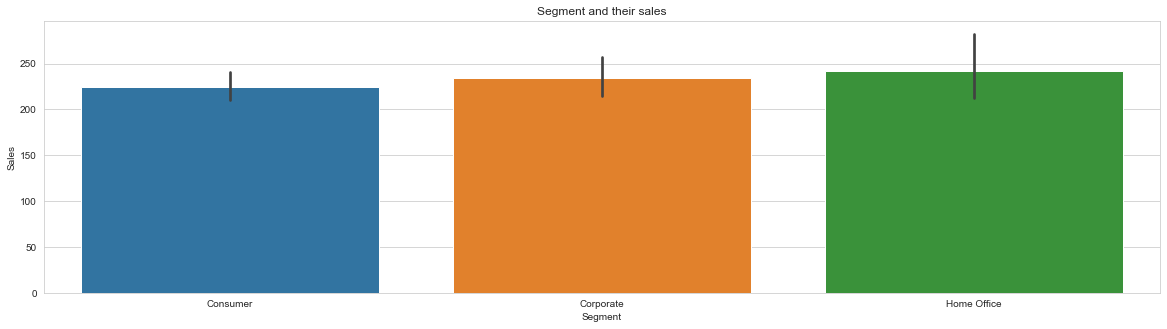

In [34]:
plt.figure(figsize=(20,5))
plt.title("Segment and their sales")
sns.barplot(x = data['Segment'] , y = data["Sales"])

### _Conclusion:_
- **Every segment is having similar Sales.**

### 14. Segment and their profit

<AxesSubplot:title={'center':'Segment and their profit'}, xlabel='Segment', ylabel='Profit'>

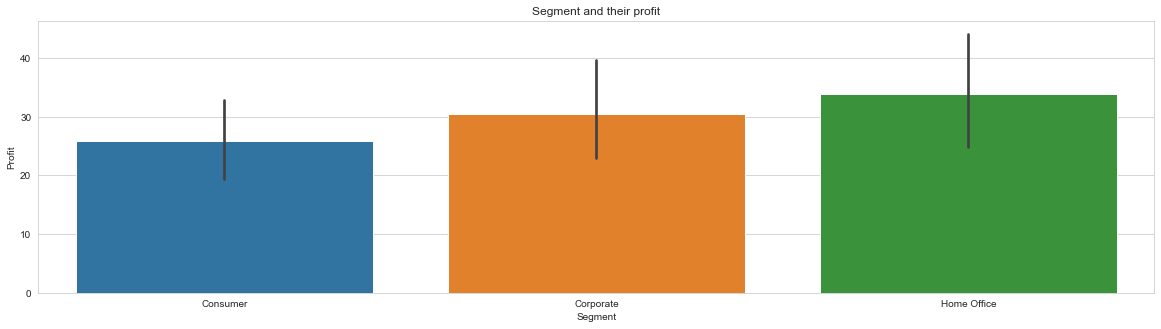

In [35]:
plt.figure(figsize=(20,5))
plt.title("Segment and their profit")
sns.barplot(x = data['Segment'] , y = data["Profit"])

### _Conclusion:_
- **Above two plots shows that Consumer segment is having maximum sales but having less profit than other segments .**

### 15. State-wise Analysis

#### 15.1 Top 10 states with maximum number of items sold

In [36]:
data.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]

State
California        1980
New York          1119
Texas              980
Pennsylvania       581
Washington         502
Illinois           490
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

#### 15.2 Top 10 states with minimum number of items sold

In [37]:
data.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

#### 15.3 Total statewise sales in descending order

In [38]:
state_wise_sales = pd.DataFrame(data.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
#state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,Sales
State,
California,456629.9285
New York,310349.2150
Texas,170101.1278
Washington,138560.8100
Pennsylvania,116383.0100


#### 15.4 Top 10 stores with maximum amount of sales
#### 15.5 Stores with minimum amount of sales

In [39]:
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
                     Sales
State                    
California    456629.9285
New York      310349.2150
Texas         170101.1278
Washington    138560.8100
Pennsylvania  116383.0100
Florida        89473.7080
Illinois       80127.3690
Ohio           77976.7640
Michigan       75879.6440
Virginia       70636.7200


States with minimum amount of sales:
                          Sales
State                         
New Mexico            4783.522
Iowa                  4579.760
Idaho                 4382.486
Kansas                2914.310
District of Columbia  2865.020
Wyoming               1603.136
South Dakota          1315.560
Maine                 1270.530
West Virginia         1209.824
North Dakota           919.910


### _Conclusion:_
- **The company needs to focus more on these 10 states that have least amount of sales.**

#### 15.6 Top 10 states with maximum amount of profit
#### 15.7 States with minimum amount of profit

In [40]:
print('States with maximum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

print('States with minimum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76215.9705
New York      74006.1552
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25753.1635
Ohio             -16959.3178
Pennsylvania     -15591.3148
Illinois         -12593.2976
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64


### _Conclusion:_
- **Company must focus on cities which made loss.**
- **They should analyse their resource usage and the categories which are being sold in those states.**

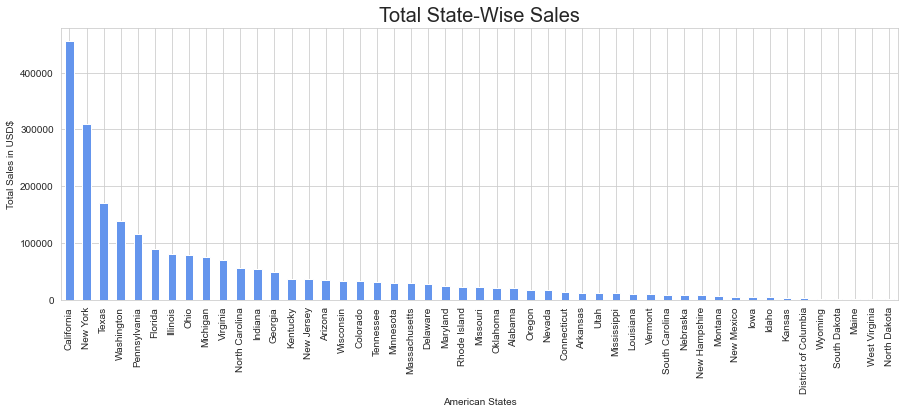

In [41]:
# total Sales for each State
df_state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

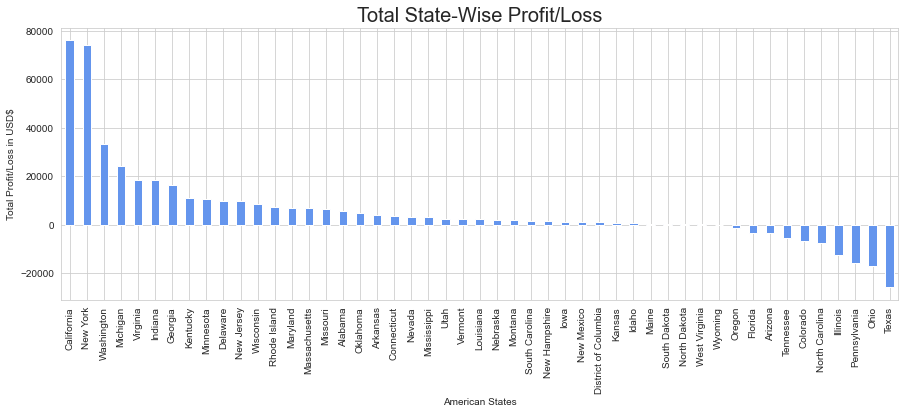

In [42]:
# total Profit for each State
df_state_profit = data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

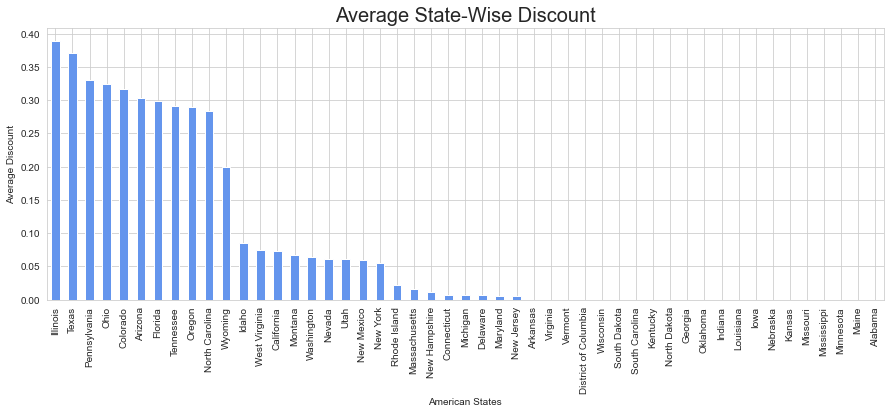

In [43]:
# average Discount for each State
df_state_profit = data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

### _Conclusion:_

- **California and New York are the top 2 places, with higher profits of around USD 75k.**

- **Texas, despite having the third highest sales, suffered the highest loss of around USD25k. This may be because it has the second highest discount level. Superstore is advised to reduce discount levels in Texas, and instead switch to other promotional strategies, in order to minimise losses.**

- **Pennsylvania, Illinois, and Ohio are the third, first, and fourth state offering larger discounts respectively, and this may be the reason behind them resulting in the third, fourth, and second biggest loss of around USD15k. Superstore is advised to switch to giving less discounts.**

- **California gives out considerably lower discounts, which may be one of the reasons behind it being top in sales and profit. This is indicative that the promotional strategy of offering less discounts is highly effective in the state of California.**

- **More than half the states make little to no profit, and a significant number of these even suffer from loss.**

- **A majority of states offer discounts under 10%.**

## Prediction and Modeling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
data = pd.get_dummies(data, columns=["Category", "Sub-Category", "Segment", "Region", "Ship Mode", "City", "State"])

In [46]:
X = data.drop("Profit", axis=1)
y = data["Profit"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [51]:
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 21735.3409103154
R-squared: 0.7463972022011703


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


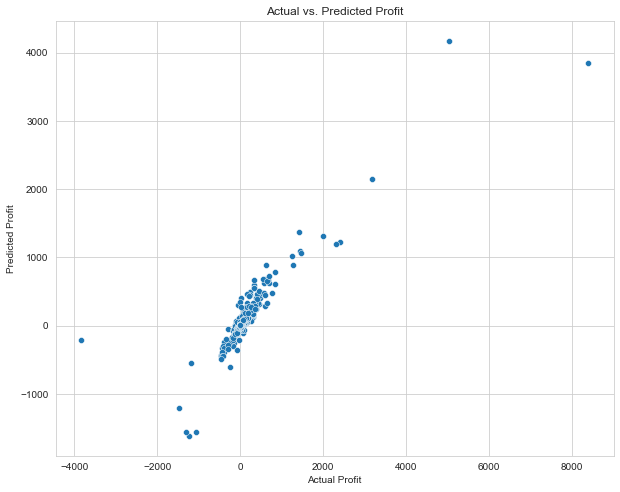

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.show()